In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from skimage.feature import hog
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#### Загружаем исходные данные

In [31]:
train = np.loadtxt('mnist_train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('mnist_test.csv', delimiter=',', skiprows=1)

In [32]:
train_label = train[:, 0]
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28))
test_img = np.resize(test, (test.shape[0], 28, 28))

#### Визуализируем исходные данные

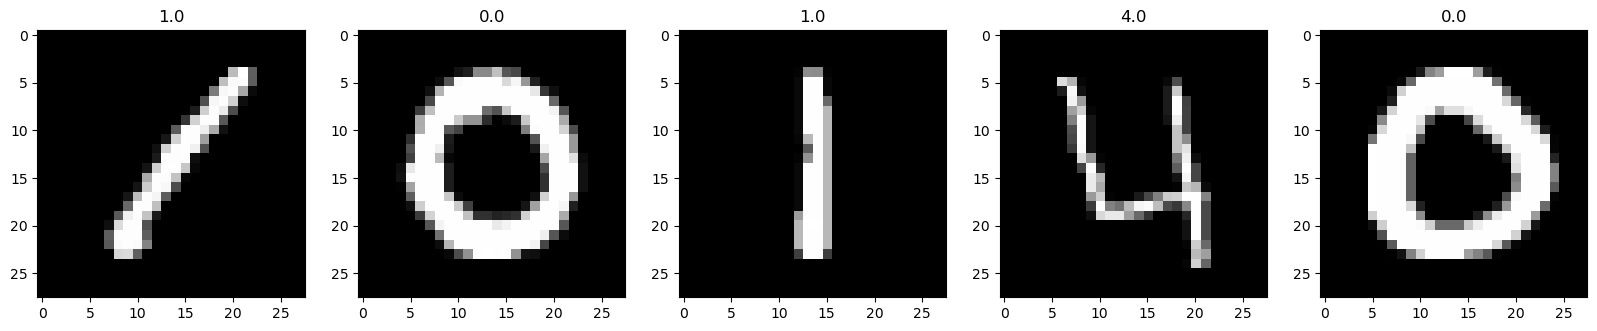

In [4]:
%matplotlib inline
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:5], 1):
    subplot = fig.add_subplot(1, 5, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1])

#### Вычисляем гистограммы градиентов

In [33]:
def extract_hog_features(images):
    features = []
    for image in images:
        fd = hog(image, orientations=8, pixels_per_cell=(4, 4), cells_per_block=(1, 1), visualize=False)
        features.append(fd)
    return np.array(features)

In [34]:
train_features = extract_hog_features(train_img)
test_features = extract_hog_features(test_img)

#### Разбиваем выборку на обучение и валидацию

In [36]:
X_train, X_val, y_train, y_val = train_test_split(train_features, train_label, test_size=0.2, random_state=42)

#### Обучение классификатора метода опорных векторов

In [ ]:
classifier = SVC(kernel='linear', random_state=42)
classifier.fit(X_train, y_train)

#### Оцениваем качество на валидационной выборке

In [12]:
y_pred_val = classifier.predict(X_val)
print('Validation Accuracy: ', accuracy_score(y_val, y_pred_val))

Validation Accuracy:  0.97


#### Предсказания на тестовых данных

In [13]:
test_predictions = classifier.predict(test_features)

#### Визуализируем предсказания

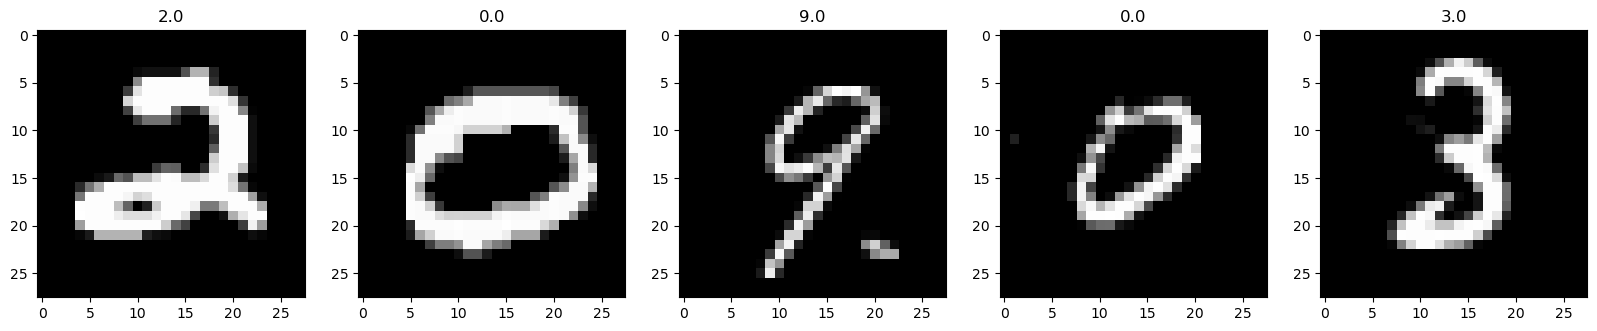

In [30]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(test_img[0:5], 1):
    subplot = fig.add_subplot(1, 5, i)
    plt.imshow(img, cmap='gray')
    subplot.set_title('%s' %test_predictions[i - 1])

#### Готовим файл для отправки

In [28]:
with open('submit.csv', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(test_predictions, 1):
        dst.write('%s,%d\n' % (i, p))